In [1]:
import koreanize_matplotlib

## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

## 3. 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 4. 한글폰트 설정

In [3]:
import koreanize_matplotlib

## 5. 데이터 불러오기

In [4]:
df = pd.read_csv('data/NHIS_OPEN_GJ_2017.CSV', encoding='cp949')
df.shape

(1000000, 34)

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [7]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
715196,2017,715197,1,13,46,165.0,60.0,84.0,0.9,0.9,...,43.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 6. 기본정보 보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기

In [11]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [12]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

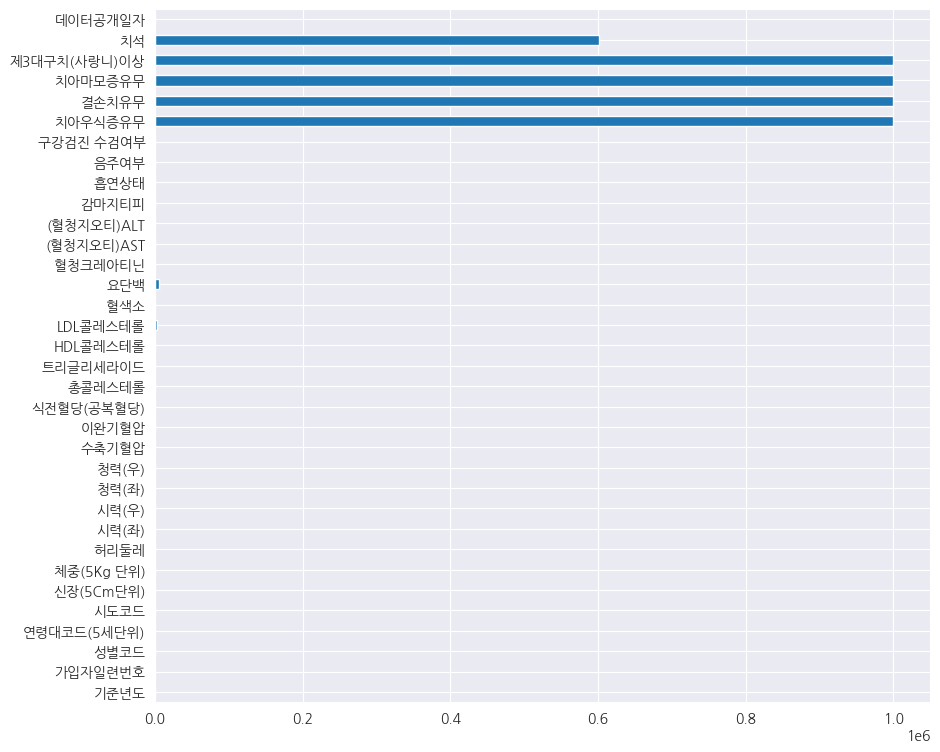

In [13]:
df.isnull().sum().plot.barh(figsize=(10, 9))

## 8. 일부 데이터 요약하기

In [14]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


## 9. value_counts로 값 집계하기

In [16]:
df["성별코드"].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [17]:
df["흡연상태"].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

## 10. groupby와 pivot_table 사용하기

In [18]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [19]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [21]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [22]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [23]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [24]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [25]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="mean")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [26]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [27]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [28]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

## 11. 전체 데이터 시각화 하기

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

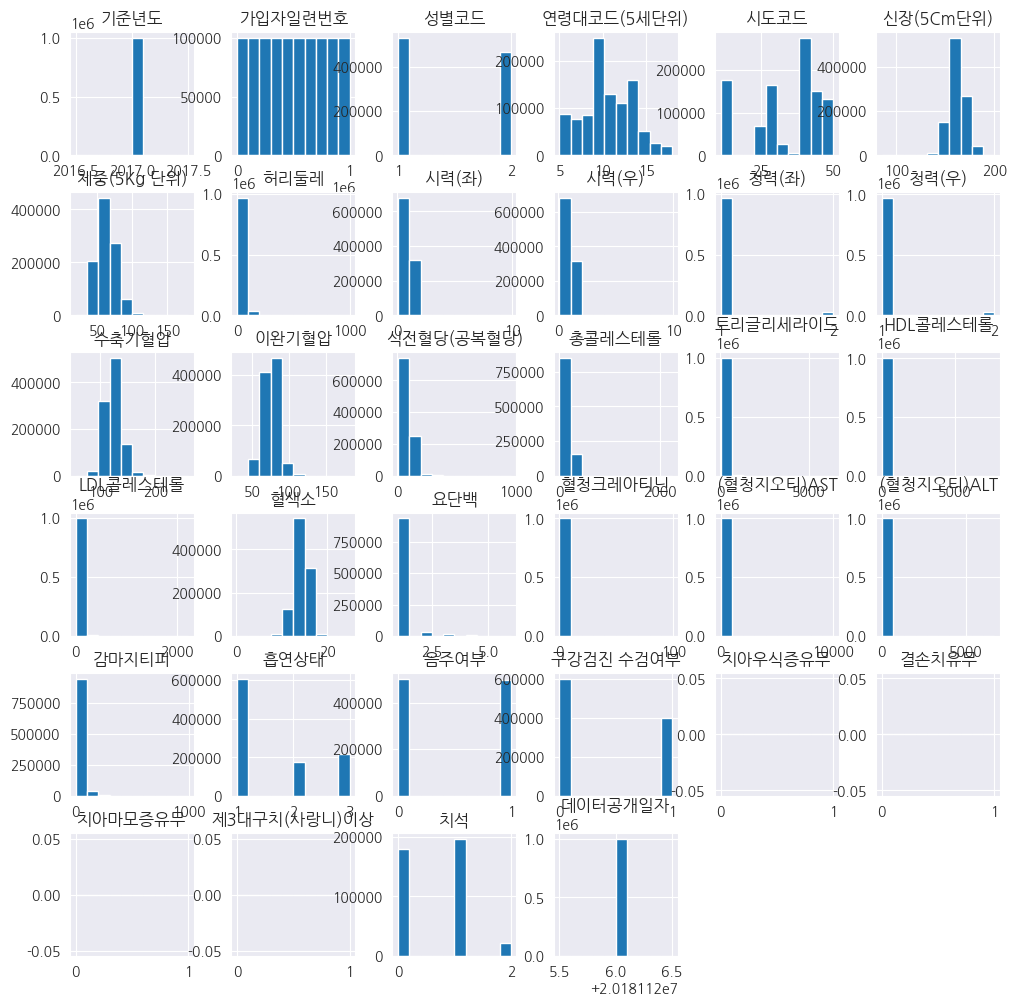

In [30]:
h = df.hist(figsize=(12, 12))

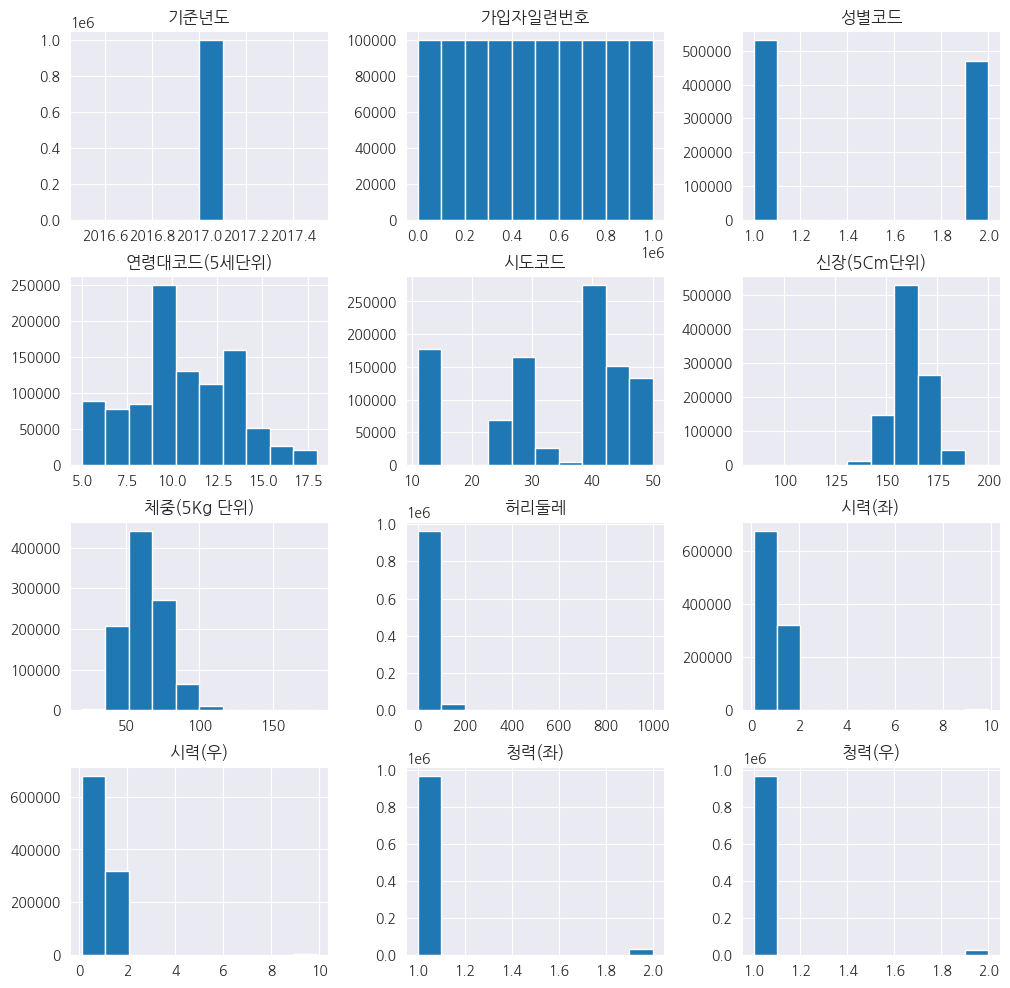

In [31]:
h = df.iloc[:, :12].hist(figsize=(12, 12))

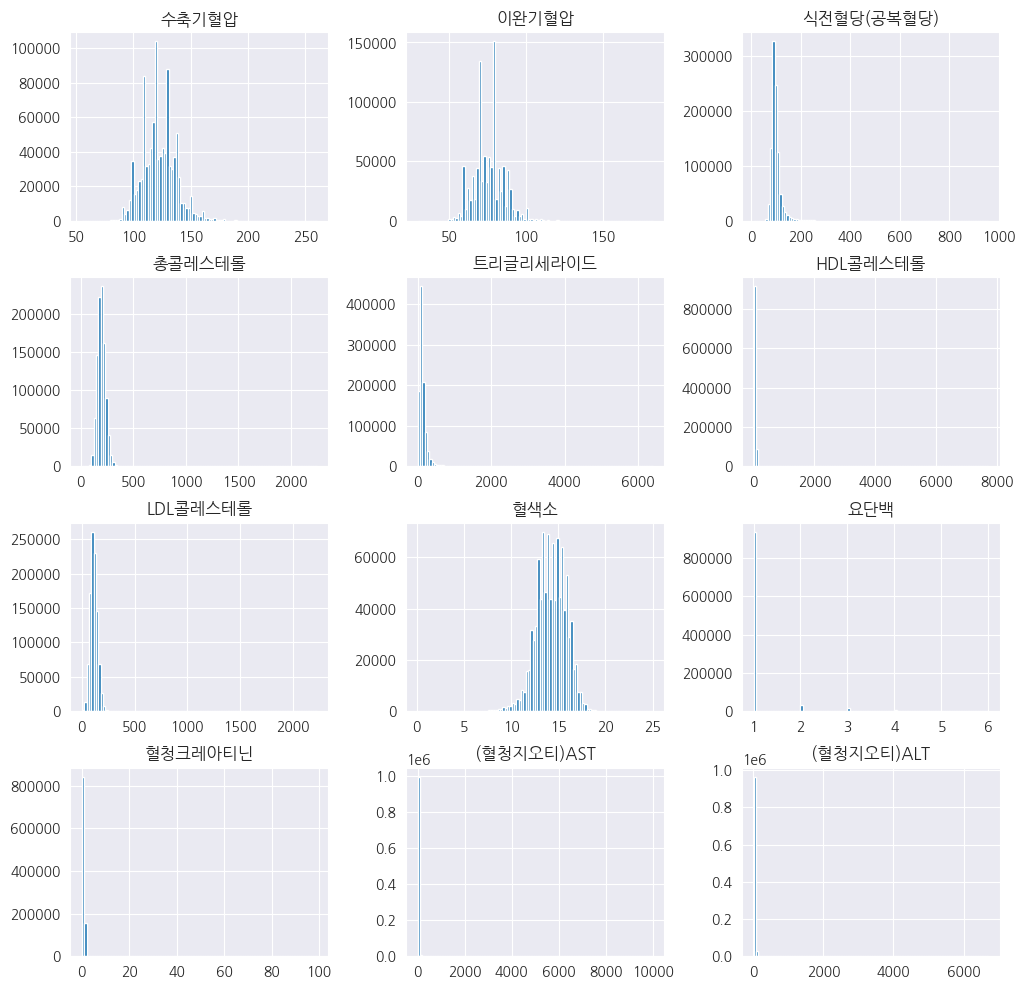

In [32]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

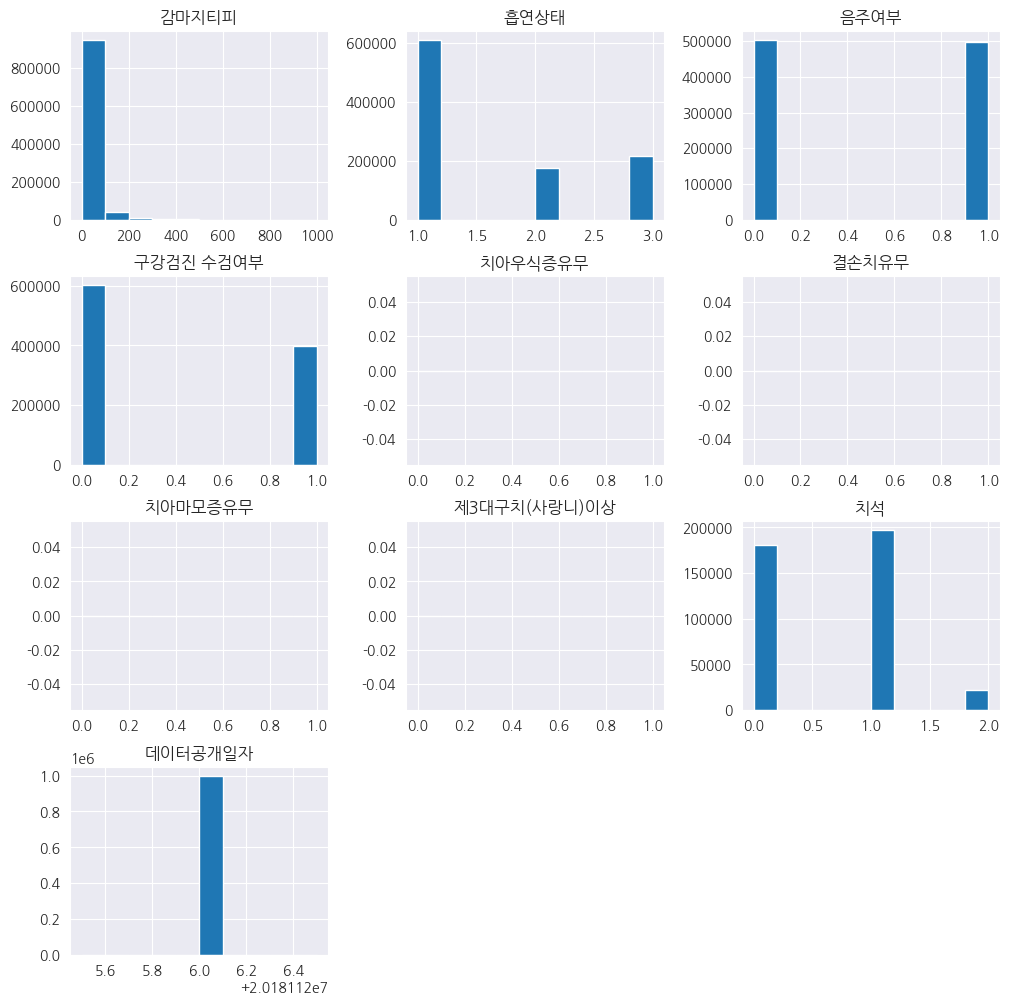

In [33]:
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=10)

## 12. 샘플데이터 추출하기

In [34]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 Seaborn 사용

## 14. 범주형(카테고리) 데이터 시각화

<Axes: xlabel='음주여부'>

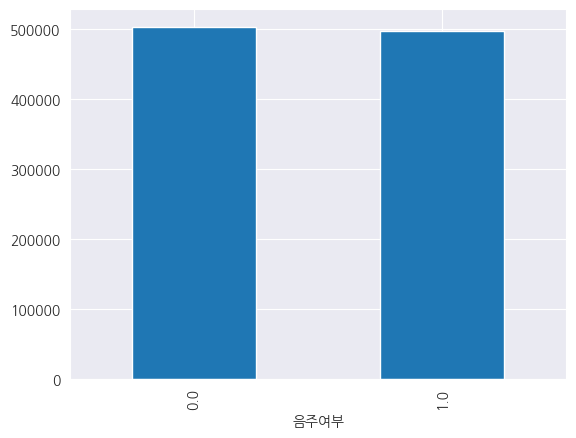

In [35]:
df["음주여부"].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

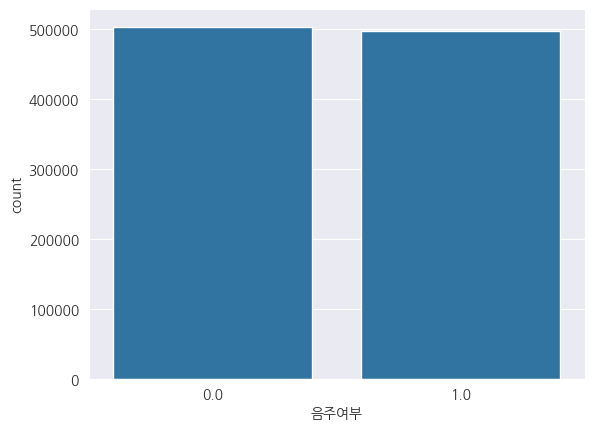

In [36]:
sns.countplot(data=df, x="음주여부")

<Axes: xlabel='음주여부', ylabel='count'>

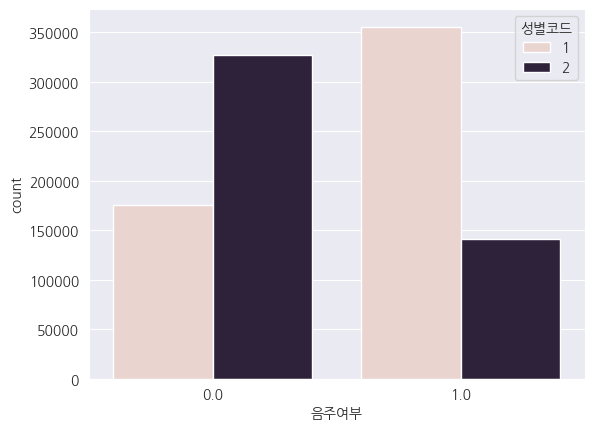

In [37]:
sns.countplot(data=df, x="음주여부", hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

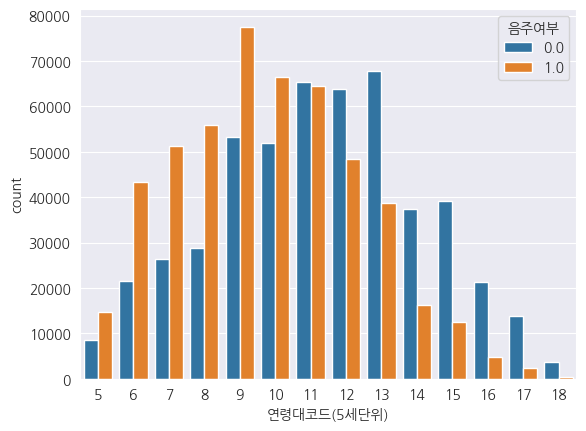

In [38]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

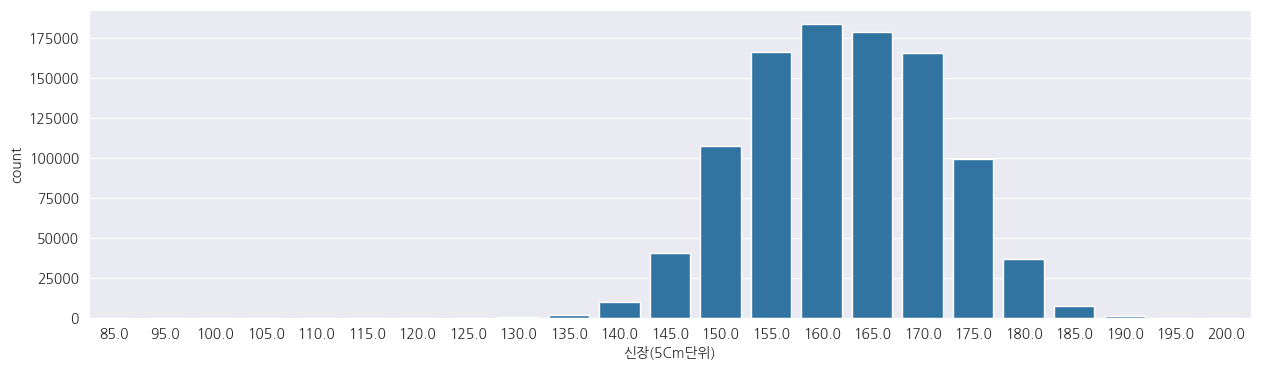

In [39]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

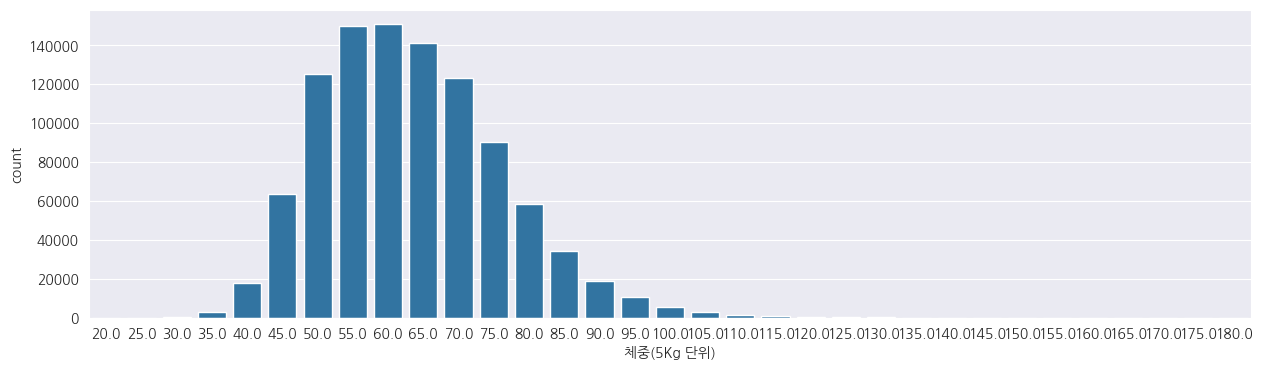

In [40]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

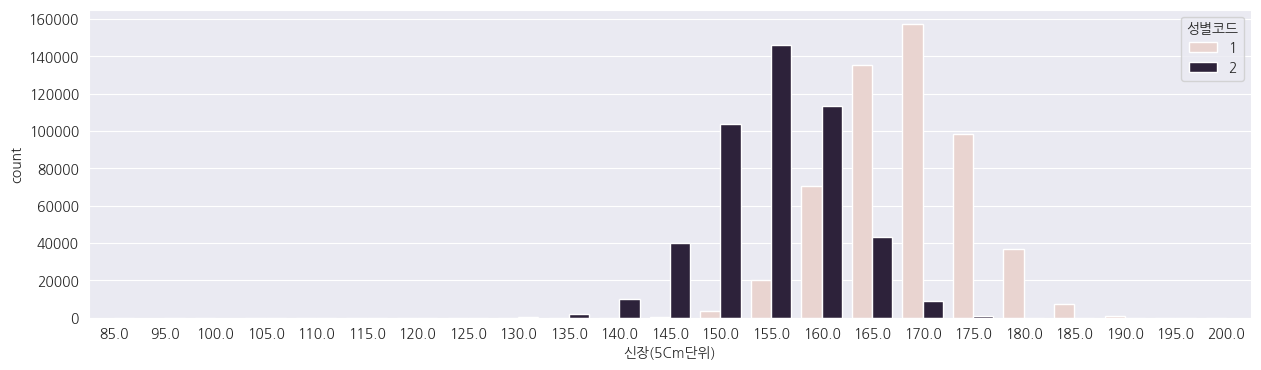

In [41]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

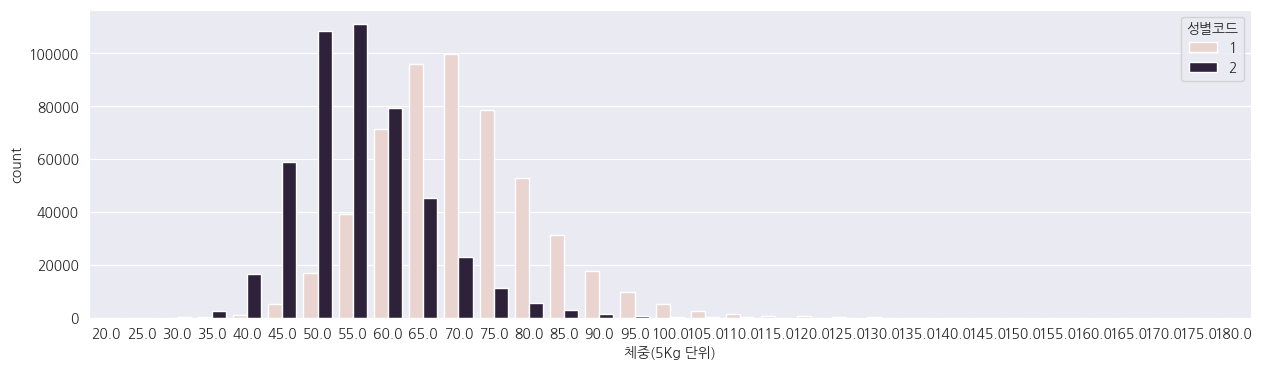

In [42]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

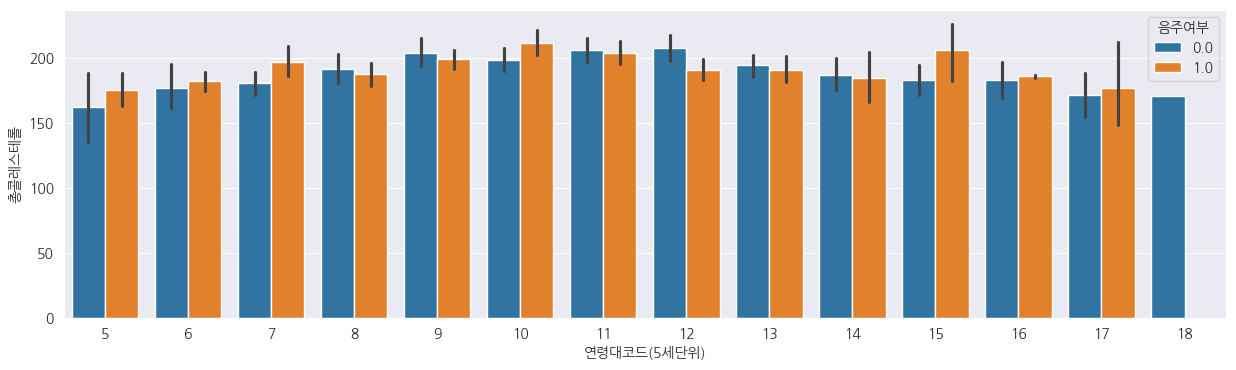

In [43]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

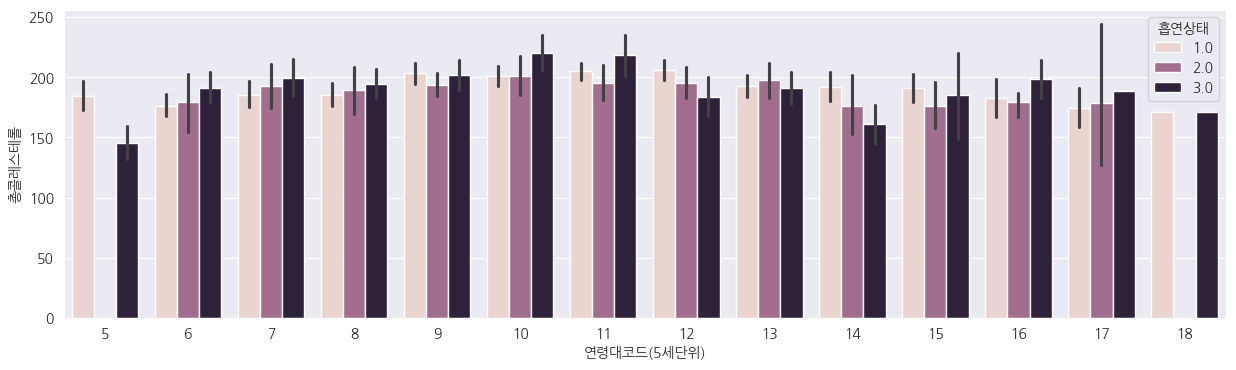

In [44]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

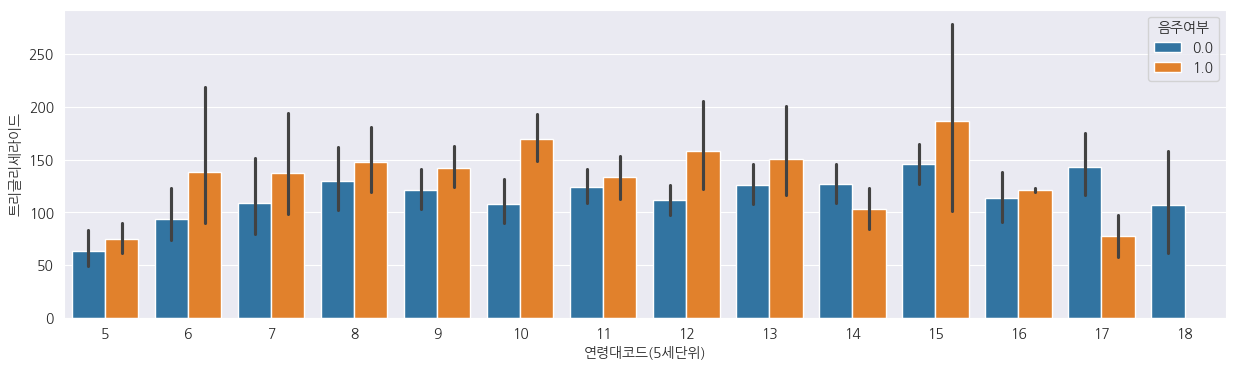

In [45]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

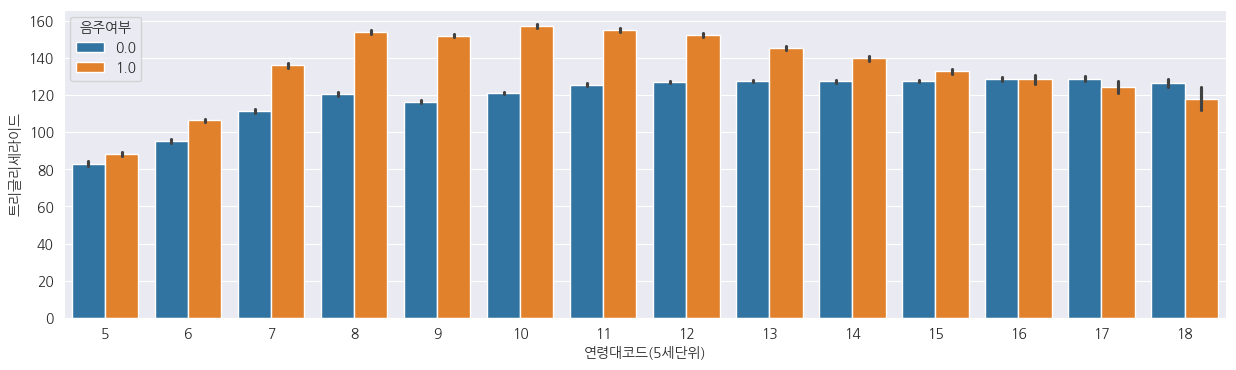

In [46]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

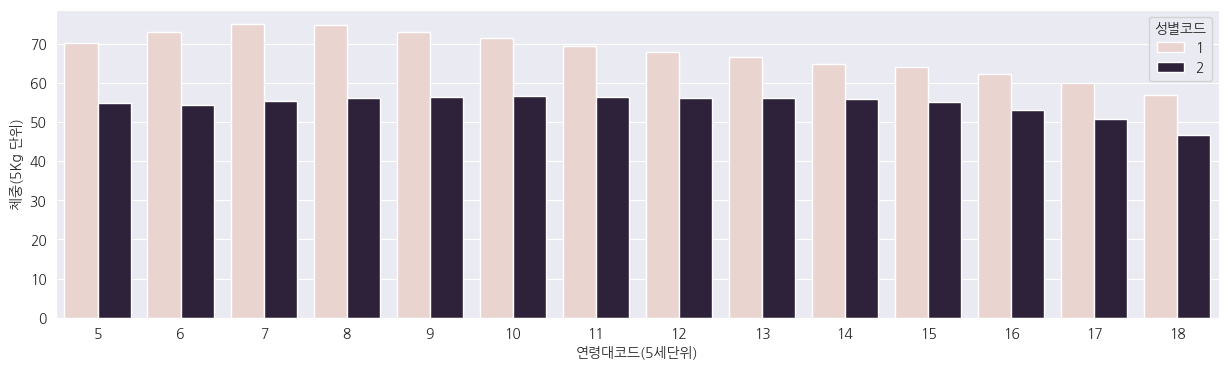

In [47]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

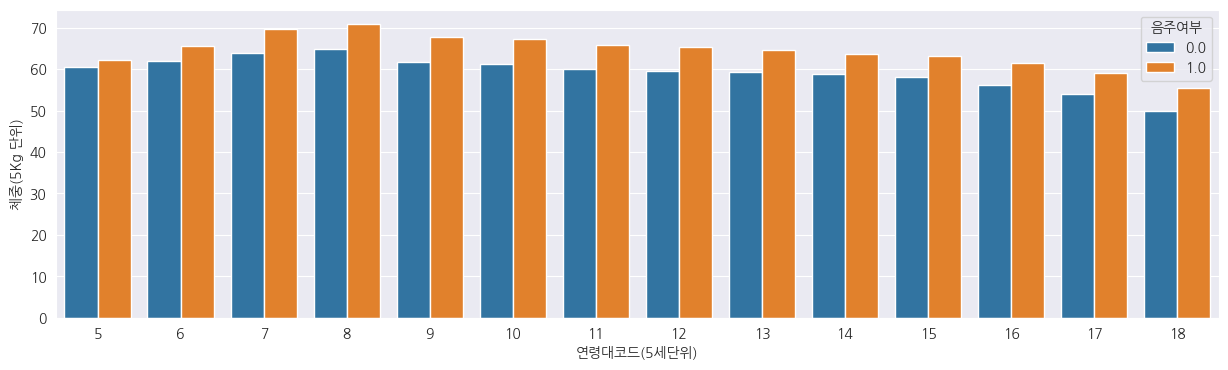

In [48]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

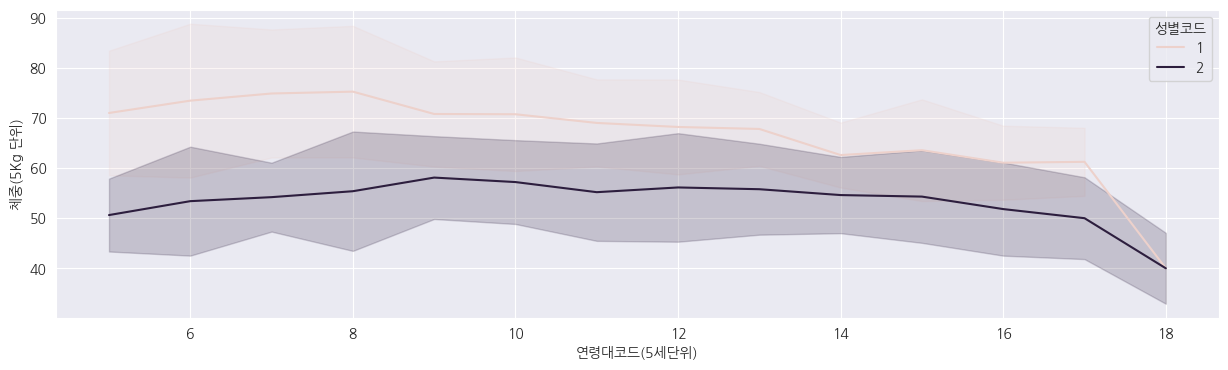

In [49]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", errorbar="sd")

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

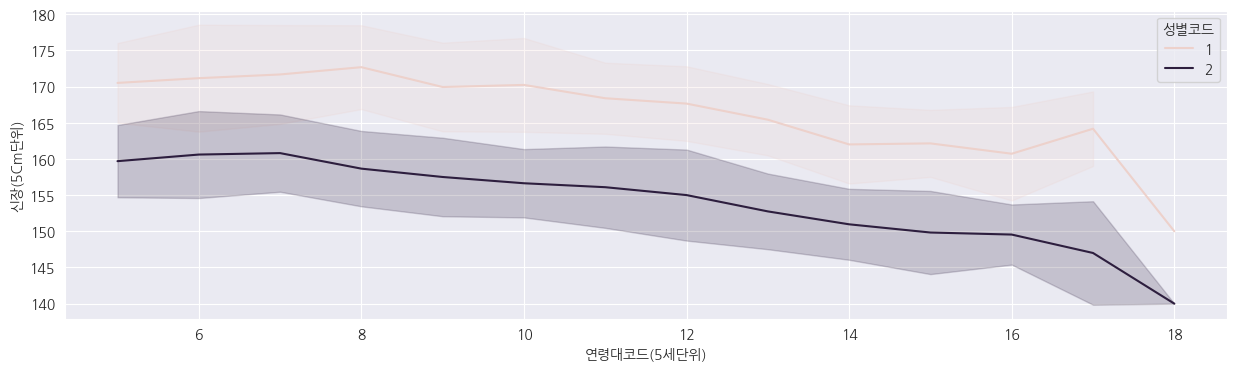

In [50]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", errorbar="sd")

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

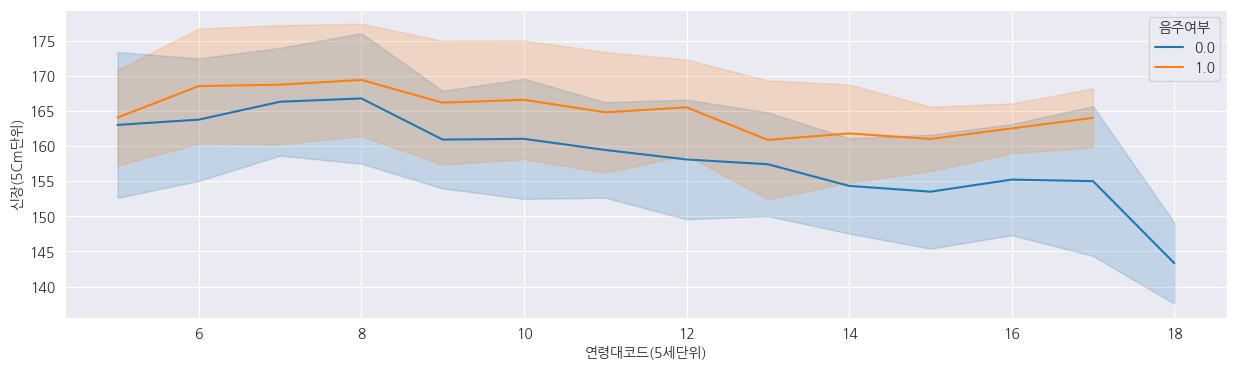

In [51]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", errorbar="sd")

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

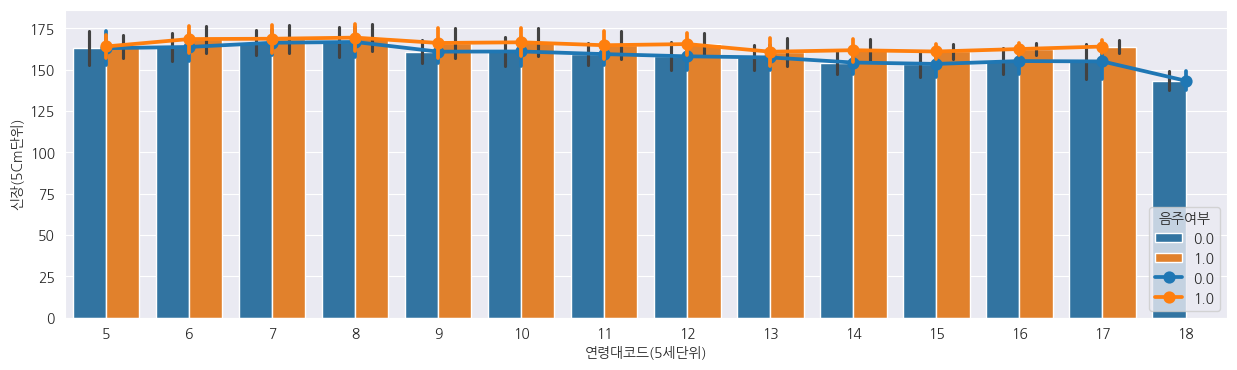

In [52]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", errorbar="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", errorbar="sd")

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

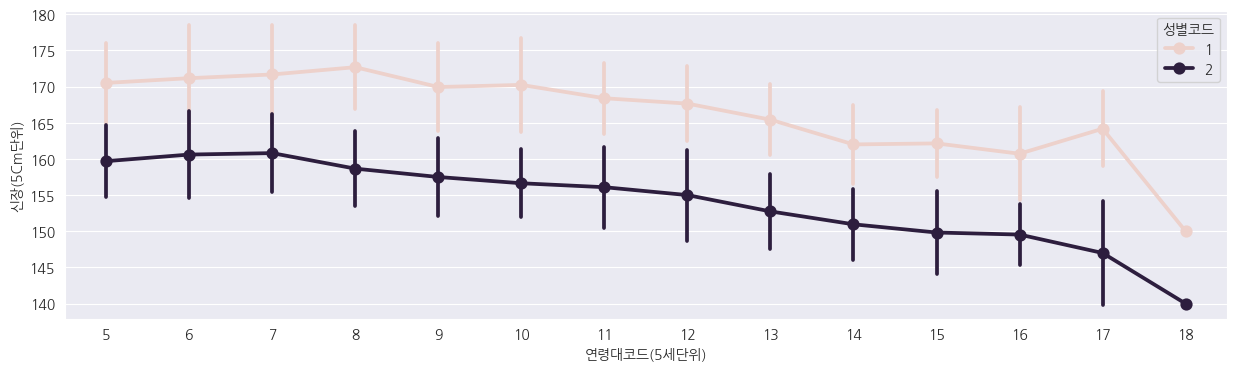

In [53]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", errorbar="sd")

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

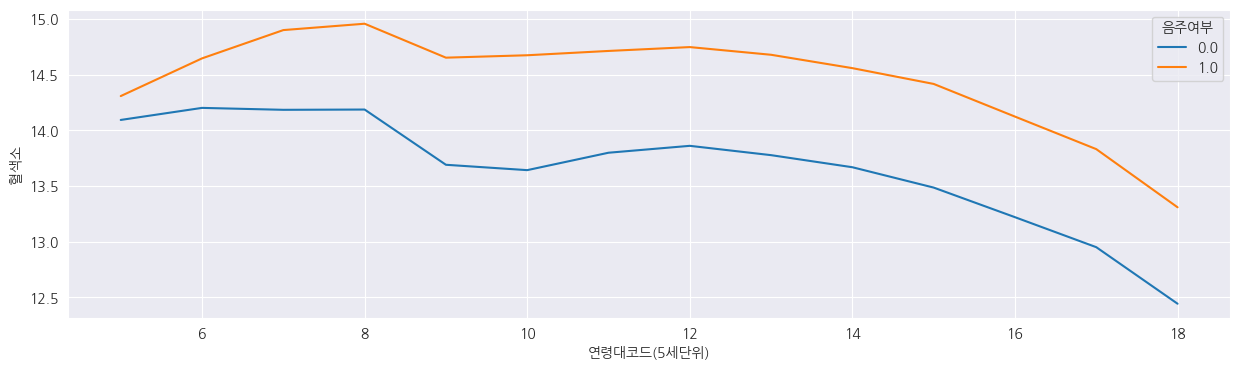

In [54]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부" ,errorbar=None)

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

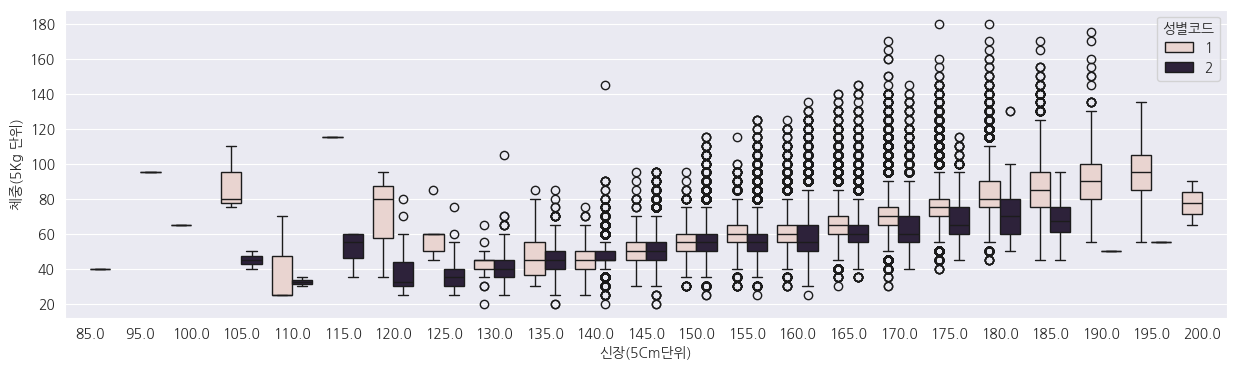

In [55]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

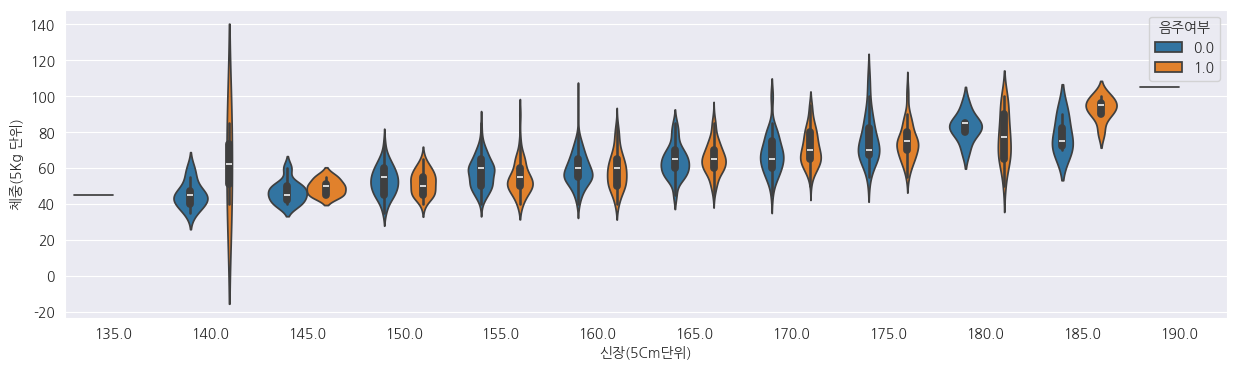

In [56]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

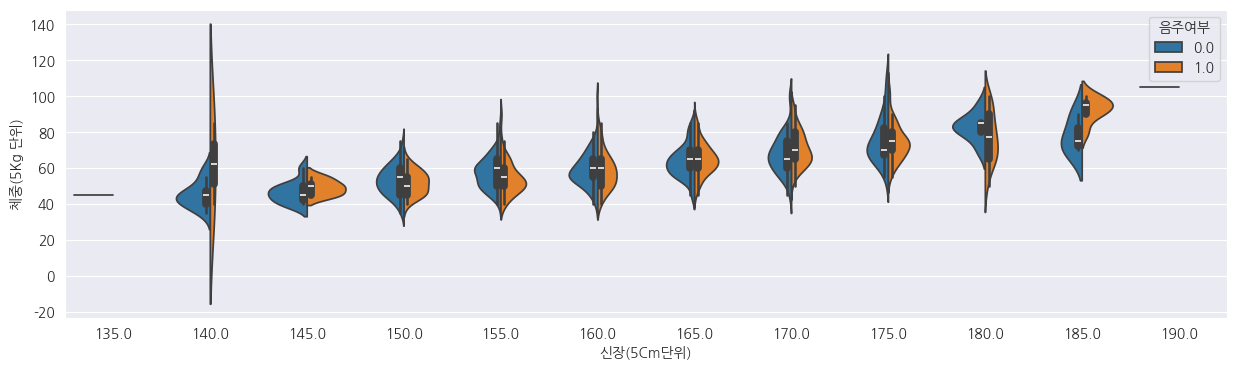

In [57]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

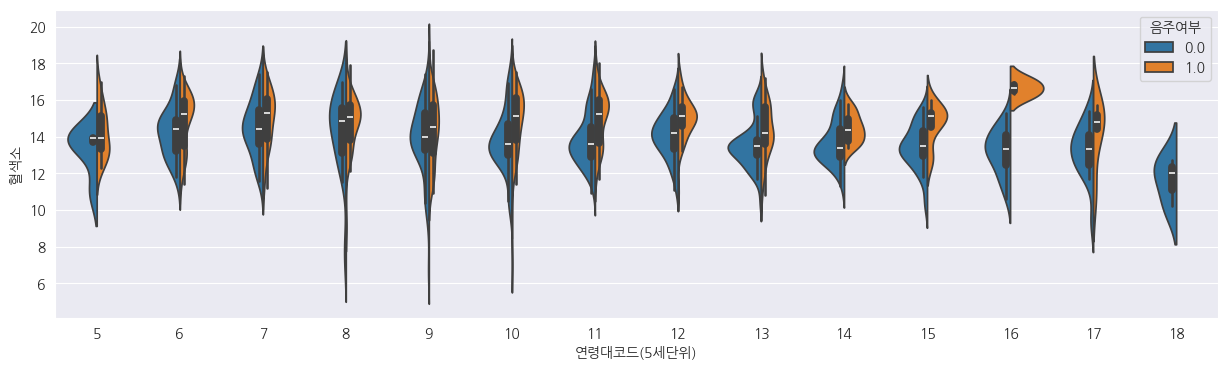

In [58]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

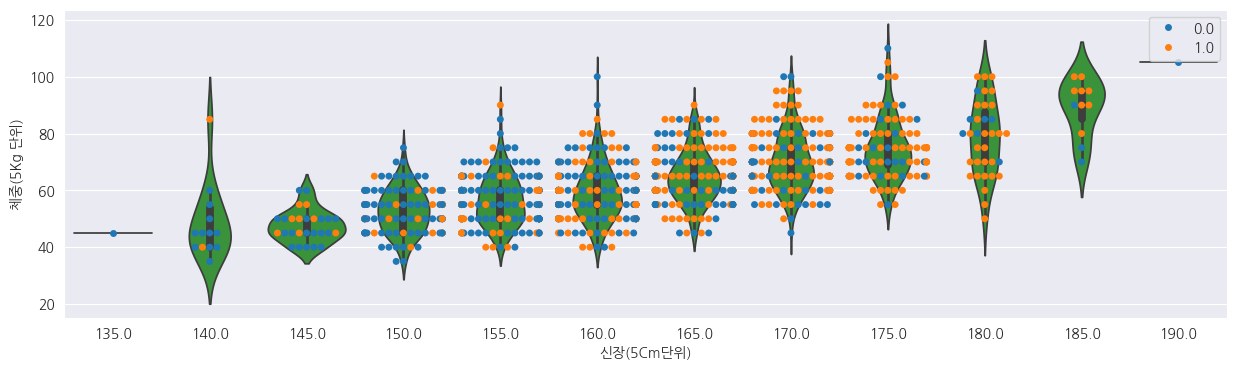

In [59]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnin

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

/Users/seokhun/Desktop/Coding/boostcource/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


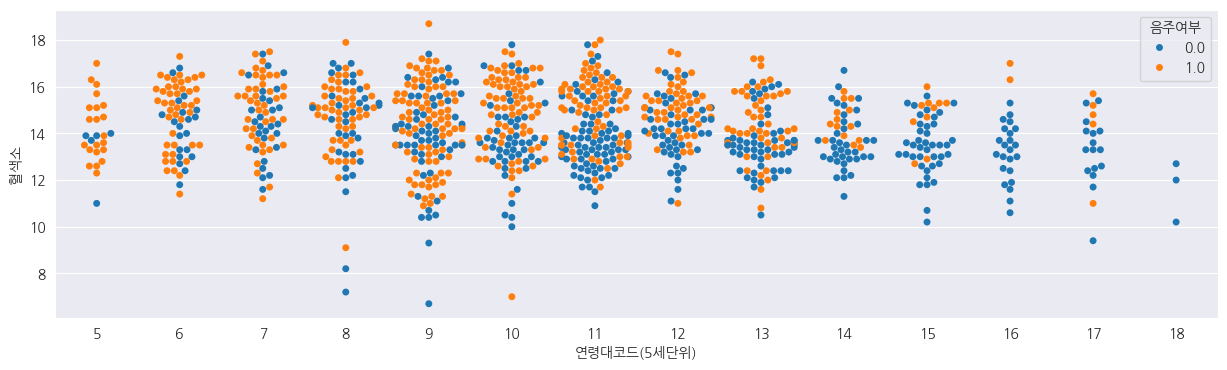

In [60]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

<Figure size 1500x400 with 0 Axes>

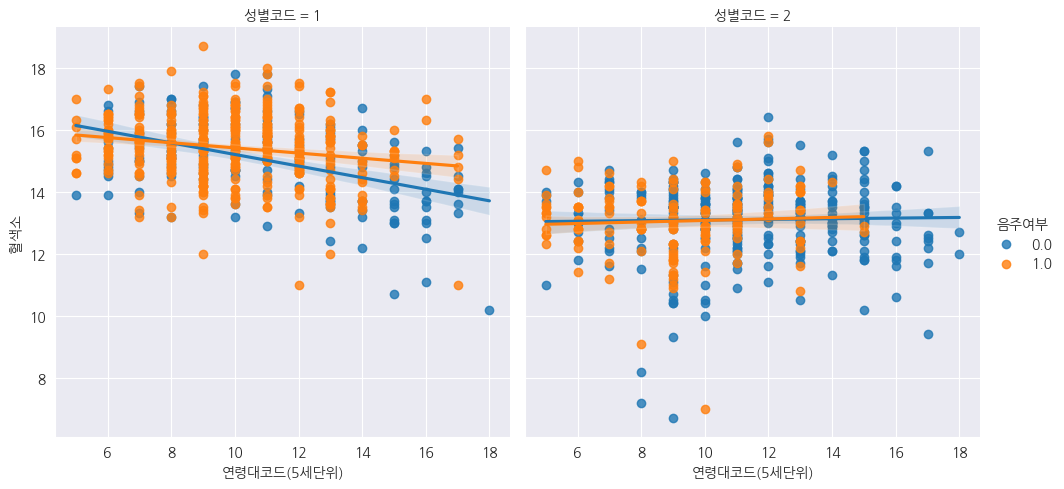

In [61]:
plt.figure(figsize=(15, 4))
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

## 15. 수치형 데이터 시각화

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

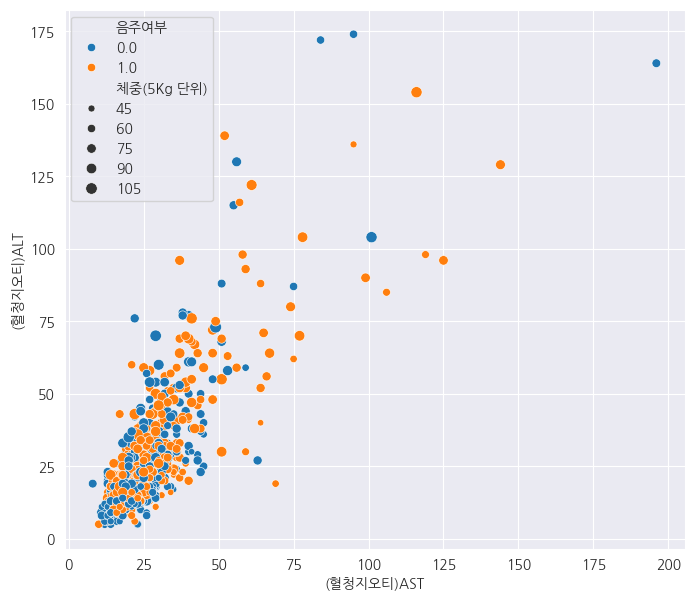

In [62]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg 단위)")

<Figure size 800x700 with 0 Axes>

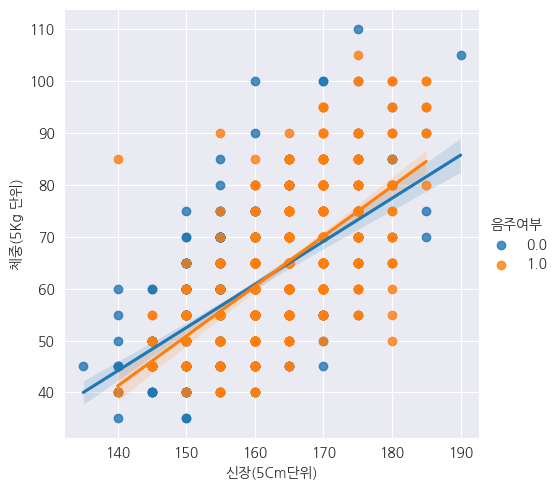

In [63]:
plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<Figure size 800x700 with 0 Axes>

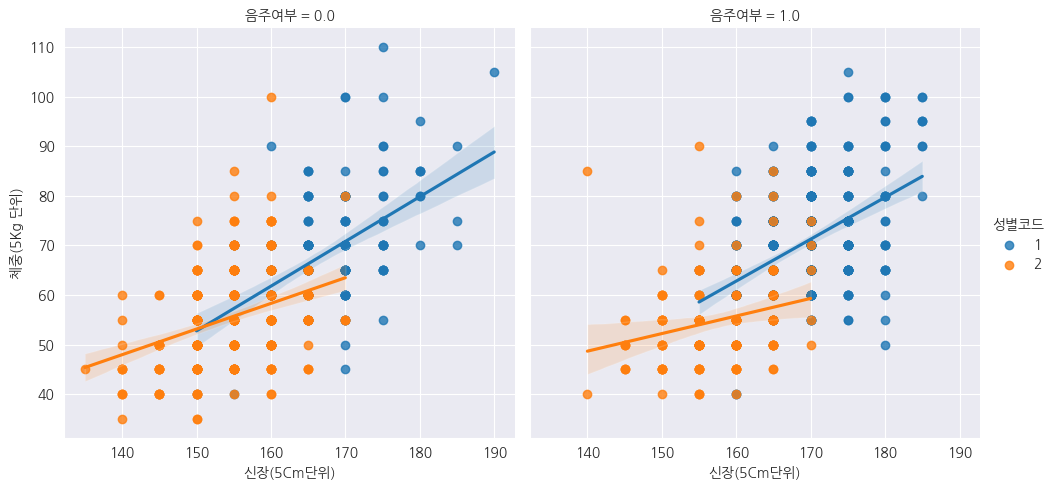

In [64]:
plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

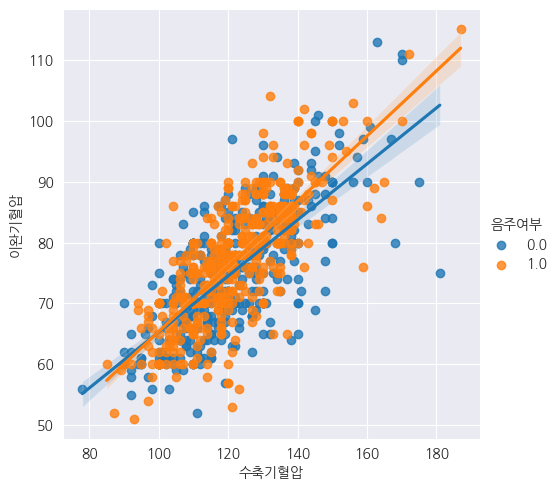

In [65]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

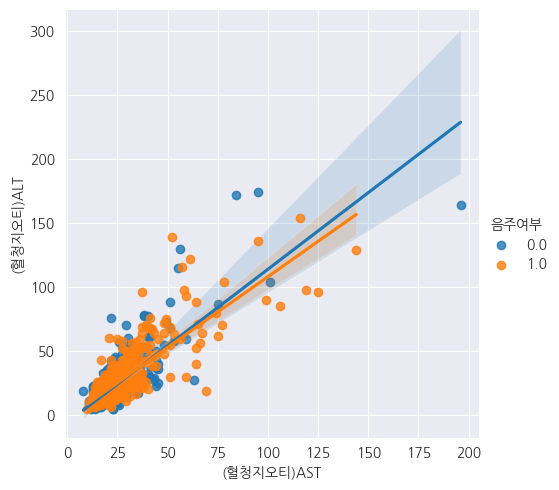

In [66]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [67]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT.shape

(1000, 34)

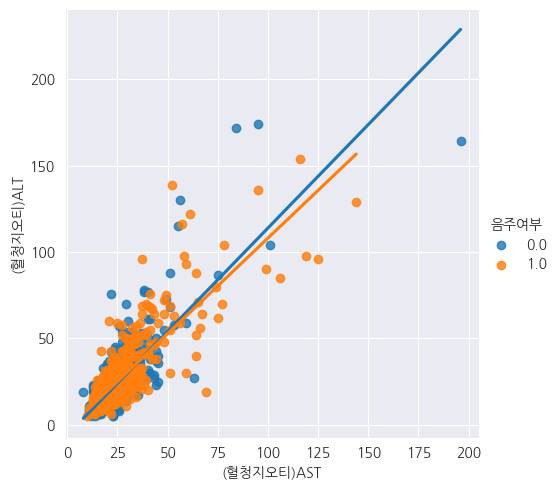

In [68]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [69]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high.shape

(394, 34)

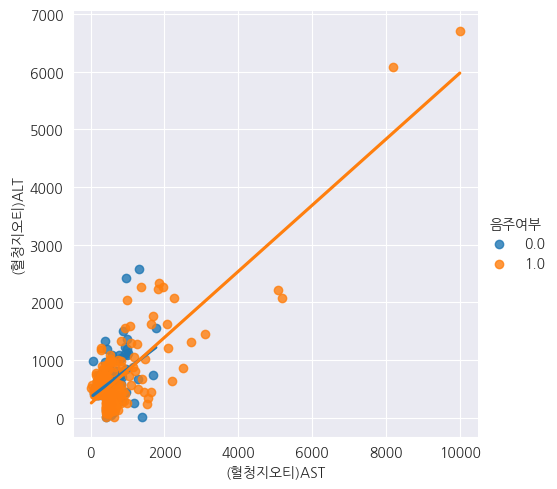

In [70]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [71]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.shape

(2, 34)

In [72]:
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
677177,2.0,2.0,100.0,60.0,107.0,129.0,152.0,30.0,69.0,13.0,1.0,1.2,8200.0,6080.0,888.0,1.0,1.0
887237,1.0,1.0,97.0,71.0,86.0,158.0,111.0,100.0,35.0,17.8,3.0,0.8,9999.0,6710.0,379.0,3.0,1.0


In [73]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

/var/folders/2p/t9hcwhts1z934qjzjq0zzpcm0000gn/T/ipykernel_94796/137137995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

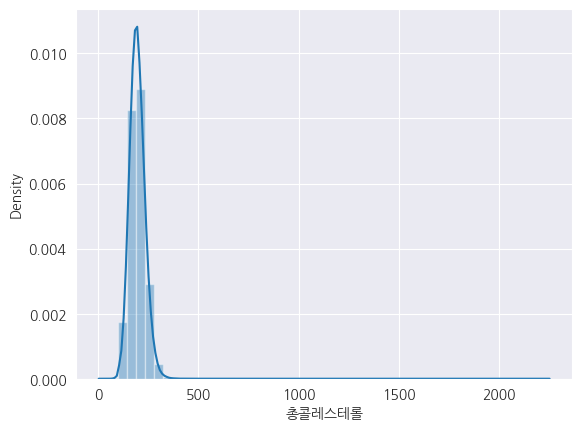

In [74]:
sns.distplot(df_chol)

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

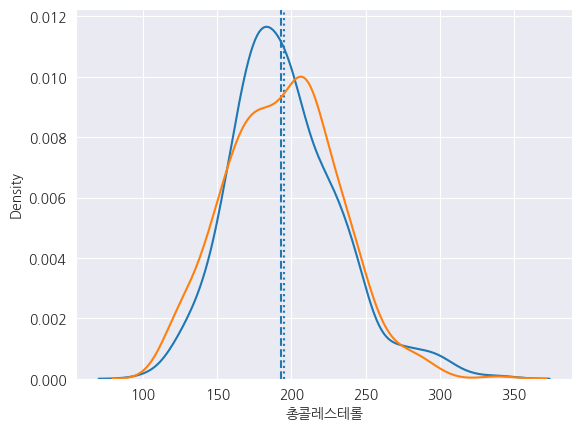

In [75]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df_sample["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[df_sample["총콜레스테롤"].notnull() & (df_sample["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

<Axes: xlabel='감마지티피', ylabel='Density'>

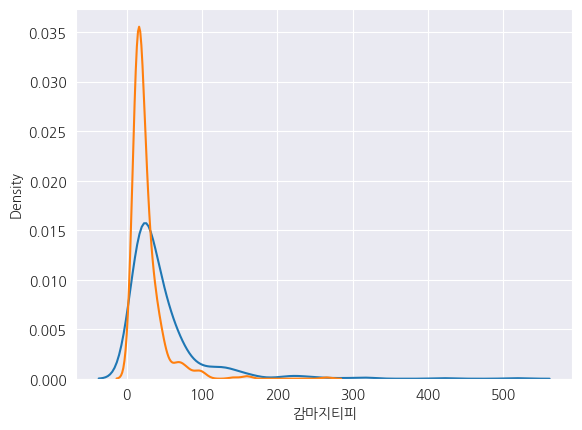

In [76]:
s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

## 16. 상관 분석

In [77]:
columns = ['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', 
           '음주여부']

In [78]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.397412,-0.210610,0.134720,-0.201947,-0.203802,0.193769,0.253585,0.296807,0.149758,...,-0.121635,0.023206,-0.165788,-0.022885,0.020587,0.106376,-0.014101,0.052946,-0.136350,-0.277149
신장(5Cm단위),-0.397412,1.000000,0.648489,0.293774,0.141800,0.156605,-0.100178,-0.121083,0.030012,0.118103,...,-0.152505,-0.003485,0.529475,0.014089,0.243101,0.035321,0.187945,0.171372,0.505945,0.362905
체중(5Kg 단위),-0.210610,0.648489,1.000000,0.790520,0.076534,0.133502,-0.038100,-0.070590,0.244673,0.287084,...,-0.357603,0.106049,0.508366,0.028840,0.190769,0.196722,0.372930,0.254150,0.397230,0.235974
허리둘레,0.134720,0.293774,0.790520,1.000000,-0.033007,0.034518,0.048379,0.052245,0.333025,0.302398,...,-0.409940,0.098301,0.377023,-0.002252,0.149351,0.229202,0.357288,0.271566,0.268685,0.084514
시력(좌),-0.201947,0.141800,0.076534,-0.033007,1.000000,0.462877,-0.049368,-0.084603,-0.010112,-0.001695,...,0.021295,-0.015221,0.073866,0.010995,0.018104,0.003379,0.029429,0.011519,0.063964,0.073696
시력(우),-0.203802,0.156605,0.133502,0.034518,0.462877,1.000000,-0.041439,-0.096255,-0.020638,0.012802,...,-0.030666,0.044949,0.056753,0.009548,0.031835,0.024706,0.083163,0.045560,0.054681,0.063220
청력(좌),0.193769,-0.100178,-0.038100,0.048379,-0.049368,-0.041439,1.000000,0.512849,0.105602,0.034535,...,-0.015340,-0.018551,-0.015990,-0.026771,-0.026352,0.014587,0.003031,-0.006351,-0.034204,-0.037669
청력(우),0.253585,-0.121083,-0.070590,0.052245,-0.084603,-0.096255,0.512849,1.000000,0.127883,0.041907,...,-0.078820,-0.059298,-0.031084,-0.013656,-0.030057,0.002233,-0.023672,0.005842,-0.040937,-0.032475
수축기혈압,0.296807,0.030012,0.244673,0.333025,-0.010112,-0.020638,0.105602,0.127883,1.000000,0.744132,...,-0.138843,0.003982,0.143038,0.016896,0.090268,0.143089,0.118240,0.176208,0.108511,0.032543
이완기혈압,0.149758,0.118103,0.287084,0.302398,-0.001695,0.012802,0.034535,0.041907,0.744132,1.000000,...,-0.090783,0.045014,0.219912,0.021567,0.131162,0.159043,0.154490,0.204673,0.144251,0.110143


In [79]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
허리둘레          0.293774
시력(좌)         0.141800
시력(우)         0.156605
이완기혈압         0.118103
트리글리세라이드      0.113687
혈색소           0.529475
혈청크레아티닌       0.243101
(혈청지오티)ALT    0.187945
감마지티피         0.171372
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [80]:
df_corr["음주여부"].sort_values()

연령대코드(5세단위)   -0.277149
LDL콜레스테롤      -0.046947
청력(좌)         -0.037669
청력(우)         -0.032475
요단백           -0.012932
총콜레스테롤         0.019892
수축기혈압          0.032543
HDL콜레스테롤       0.052452
시력(우)          0.063220
혈청크레아티닌        0.072320
시력(좌)          0.073696
허리둘레           0.084514
식전혈당(공복혈당)     0.086991
(혈청지오티)AST     0.088594
(혈청지오티)ALT     0.095971
트리글리세라이드       0.103018
이완기혈압          0.110143
체중(5Kg 단위)     0.235974
감마지티피          0.250011
혈색소            0.291863
신장(5Cm단위)      0.362905
흡연상태           0.365642
음주여부           1.000000
Name: 음주여부, dtype: float64

In [81]:
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [82]:
df_corr["혈색소"].sort_values()

HDL콜레스테롤      -0.208488
연령대코드(5세단위)   -0.165788
청력(우)         -0.031084
청력(좌)         -0.015990
요단백            0.019795
시력(우)          0.056753
시력(좌)          0.073866
LDL콜레스테롤       0.112034
총콜레스테롤         0.122240
식전혈당(공복혈당)     0.131582
수축기혈압          0.143038
(혈청지오티)AST     0.171762
트리글리세라이드       0.200421
혈청크레아티닌        0.214091
이완기혈압          0.219912
감마지티피          0.236197
음주여부           0.291863
(혈청지오티)ALT     0.294575
허리둘레           0.377023
흡연상태           0.460010
체중(5Kg 단위)     0.508366
신장(5Cm단위)      0.529475
혈색소            1.000000
Name: 혈색소, dtype: float64

In [83]:
df_corr.loc[df_corr["혈색소"] > 0.25, "혈색소"]

신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
허리둘레          0.377023
혈색소           1.000000
(혈청지오티)ALT    0.294575
흡연상태          0.460010
음주여부          0.291863
Name: 혈색소, dtype: float64

In [84]:
df_corr["감마지티피"].sort_values(ascending=False)

감마지티피          1.000000
(혈청지오티)AST     0.525509
(혈청지오티)ALT     0.514197
트리글리세라이드       0.335514
흡연상태           0.305811
식전혈당(공복혈당)     0.292087
허리둘레           0.271566
체중(5Kg 단위)     0.254150
음주여부           0.250011
혈색소            0.236197
이완기혈압          0.204673
수축기혈압          0.176208
신장(5Cm단위)      0.171372
총콜레스테롤         0.167026
혈청크레아티닌        0.071904
연령대코드(5세단위)    0.052946
LDL콜레스테롤       0.046815
시력(우)          0.045560
시력(좌)          0.011519
요단백            0.008634
청력(우)          0.005842
청력(좌)         -0.006351
HDL콜레스테롤      -0.121648
Name: 감마지티피, dtype: float64

<Axes: >

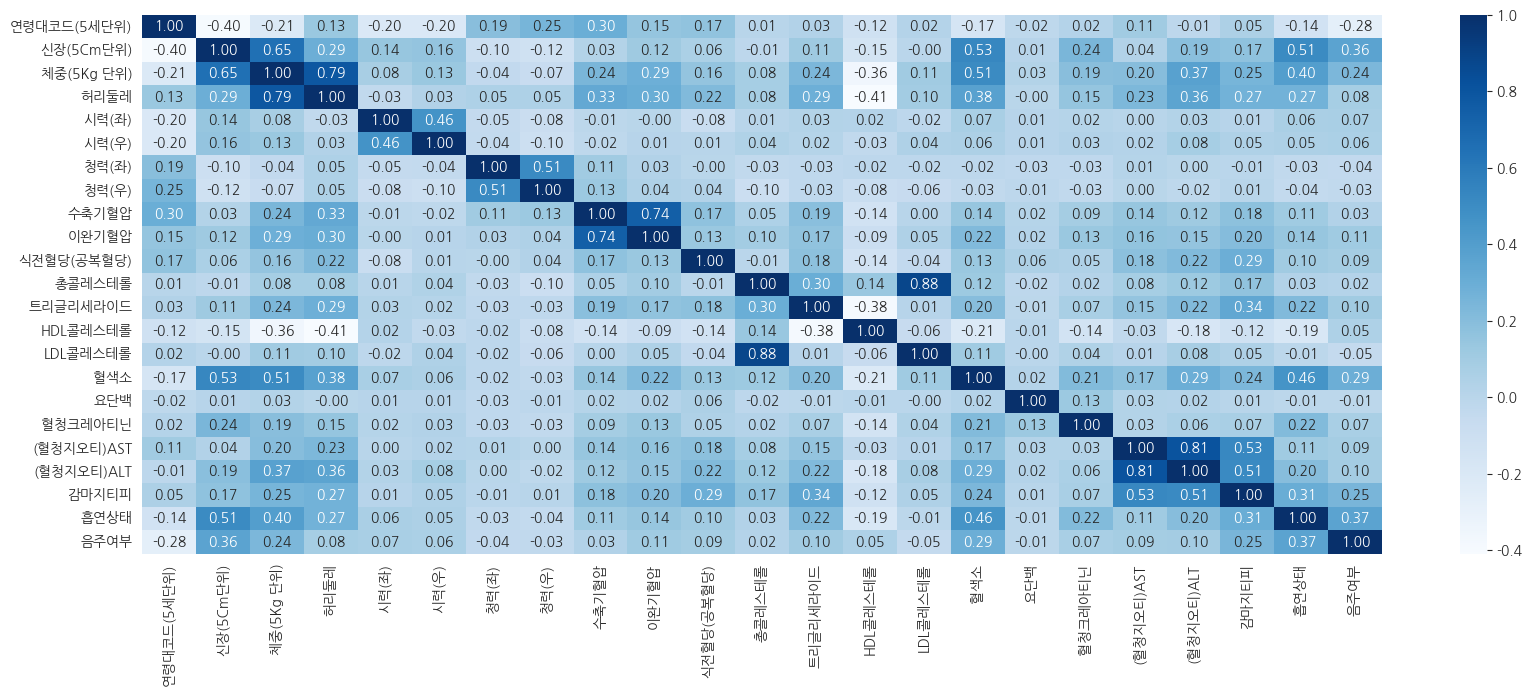

In [85]:
plt.figure(figsize=(20, 7))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap="Blues")

In [86]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

<Axes: >

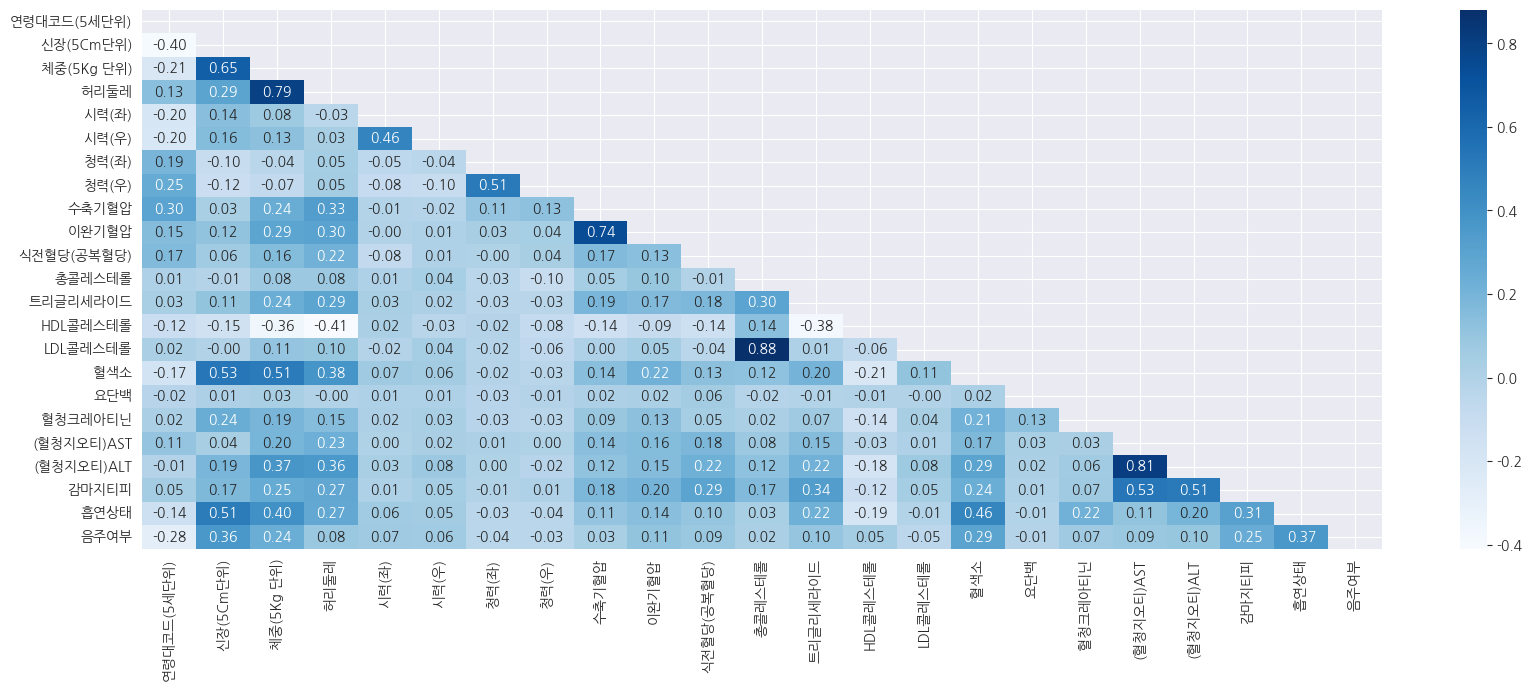

In [87]:
plt.figure(figsize=(20, 7))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)